## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



In [ ]:
https://github.com/Aryan12042001/Assignment_3_CPSC

Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic[['Survived','Pclass']].describe()

,Survived,Pclass
count,891.000000,891.000000
mean,0.383838,2.308642
std,0.486592,0.836071
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


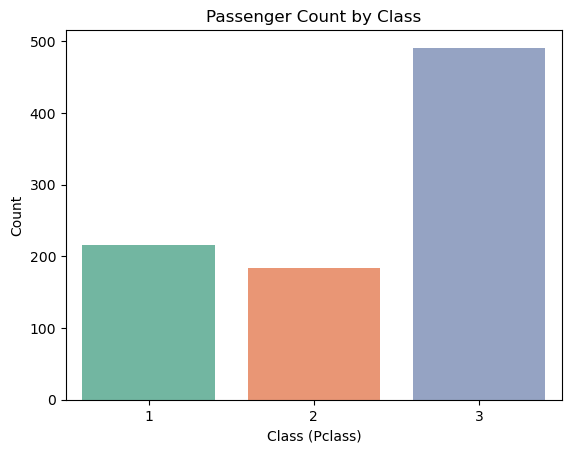

In [25]:
sns.countplot( x='Pclass', data=titanic, palette="Set2")
plt.title("Passenger Count by Class")
plt.xlabel("Class (Pclass)")
plt.ylabel("Count")
plt.show()

In [32]:
#percentage of survival rate
survival_rates = titanic.groupby("Pclass")['Survived'].mean()
survival_rates

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x20ee3e250d0>,
 [Text(-0.8592101940866288, -0.8377098795989085, 'Class 1'),
  Text(1.0766182123957173, 0.22559526754311598, 'Class 2'),
  Text(-0.3318834711806364, 1.0487389387054777, 'Class 3')],
 [Text(-0.5012059465505334, -0.48866409643269665, '46.8%'),
  Text(0.5872462976703913, 0.12305196411442688, '35.2%'),
  Text(-0.18102734791671074, 0.5720394211120787, '18.0%')])

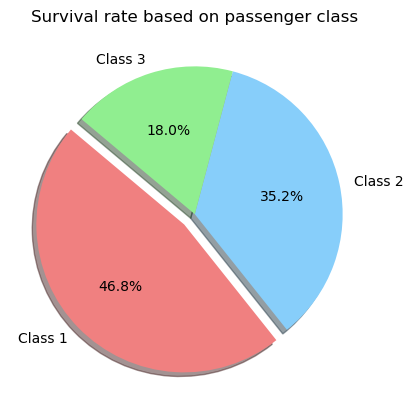

In [34]:
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survival_rates.values * 100
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0)
plt.title("Survival rate based on passenger class")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

Determine if the survival rate is associated to the class of passenger:
Null Hypothesis (H0): The survival rate is not associated with the class of the passenger.
Alternative Hypothesis (H1): The survival rate is associated with the class of the passenger.

After conducting EDA on the titanic dataset, we have observed the following insights between PClass ans Survival rates:
Findings:
Class 1 had the highest survival rate of 46.8%, followed by class 2, being 35.2% and lastly Class 1 being 18%
The difference in the survival rate of classes is noticeable as Class 1 has more than double the survival rate of class 3
This suggests a strong association between class and survival rates

Conclusion:
We reject the Null Hypothesis (H0), accepting the alternative hypothesis because the data clearly shows that passenger class is directly correlated to survival rates.
First Class passengers had higher survival rate than 3rd class passengers.

In [57]:
survival_summary = titanic.groupby('Sex')['Survived']
survival_summary.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

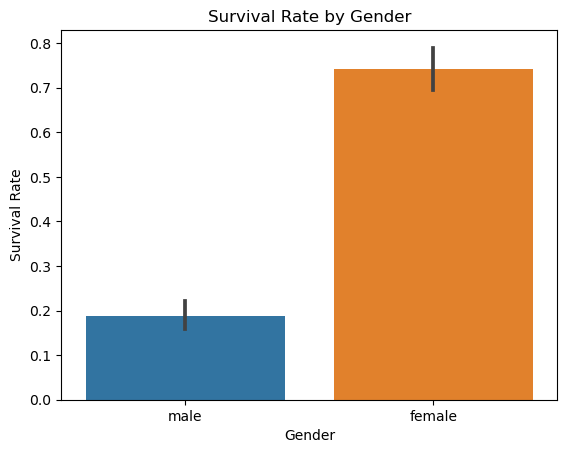

In [46]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')plt.show()

Determine if the survival rate is associated with gender
Null Hypothesis (H0): There is no significant association between gender and the survival rate among passengers on the Titanic
Alternative Hypothesis (H1): There is a significant association between gender and the survival rate among passengers on the Titanic

Findings:
After conducting EDA on the titanic dataset, we have observed the following insights between PClass ans Survival rates:
Females had a significantly greater survival rate of 74% compared to the male survival rate of 18.9%.
The difference in survival rate between the two genders is evident in the findings as female survival rate was almost 4 times as much as male survival rate

Conclusion:
We reject Null Hypothesis(H0), accepting the alternative Hypothesis(h1) as there is a definite correlation between the gender and survival rate as female survival rate is much higher than male survival rate as evidenced by my analysis.

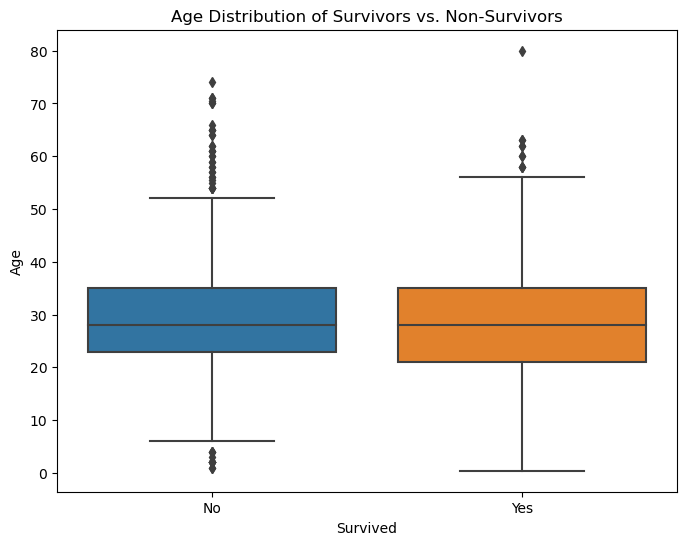

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Survived")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Age")
plt.show()

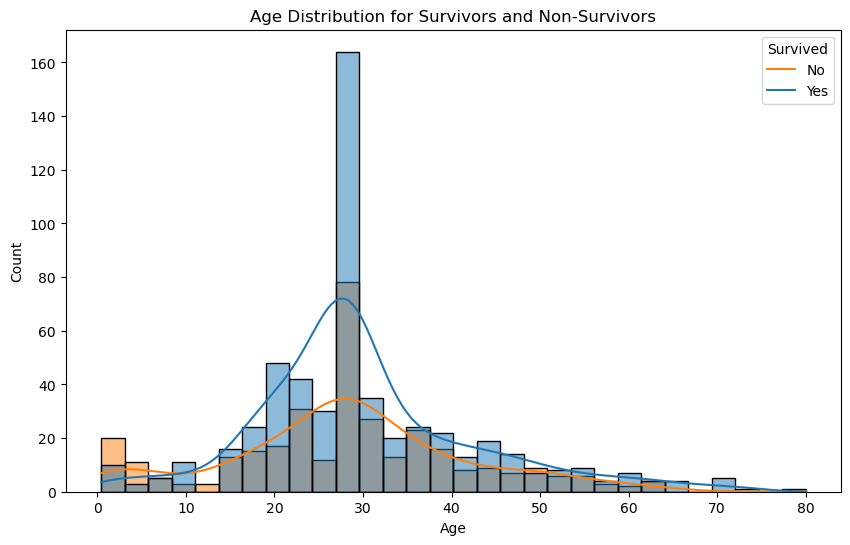

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution for Survivors and Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [74]:
titanic['AgeCategory'] = pd.cut(titanic['Age'], bins=[0, 18, 30, 50, 80], labels=['0-18', '19-30', '31-50', '51-80'])

age_survival_rates = titanic.groupby('AgeCategory')['Survived'].mean()
print("Survival Rates by Age Category:")
print(age_survival_rates)


Survival Rates by Age Category:
AgeCategory
0-18     0.503597
19-30    0.331096
31-50    0.423237
51-80    0.343750
Name: Survived, dtype: float64


In [76]:
age_mean_survivors = titanic[titanic['Survived'] == 1]['Age'].mean()
age_median_survivors = titanic[titanic['Survived'] == 1]['Age'].median()
age_mean_non_survivors = titanic[titanic['Survived'] == 0]['Age'].mean()
age_median_non_survivors = titanic[titanic['Survived'] == 0]['Age'].median()


In [77]:
print("Summary Statistics for Age Among Survivors:")
print("Mean Age (Survivors):", age_mean_survivors)
print("Median Age (Survivors):", age_median_survivors)

Summary Statistics for Age Among Survivors:
Mean Age (Survivors): 28.29143274853801
Median Age (Survivors): 28.0


In [78]:
print("Summary Statistics for Age Among Non-Survivors:")
print("Mean Age (Non-Survivors):", age_mean_non_survivors)
print("Median Age (Non-Survivors):", age_median_non_survivors)

Summary Statistics for Age Among Non-Survivors:
Mean Age (Non-Survivors): 30.028233151183972
Median Age (Non-Survivors): 28.0


Hypothesis 3: Determine if the survival rate is associated with age
Null Hypothesis (H0): The age of passengers is not associated with their survival rate, and there is no significant difference in survival rates among different age groups.
Alternative Hypothesis (H1): The age of passengers is associated with their survival rate, and there is a significant difference in survival rates among different age groups.

Findings:
As the mean and median age of survivors(28.9, 28) and non-survivors(30, 28) is similar, we cannot see any direct correlation between the two variables.
The little difference in the mean may be caused by outliers as mean does not take those into account. That is why the more accurate values to consider are the median, which are both 28.
The histogram and boxplot also shows a similar shaped graph with both being symetrically shaped and not skewed to any side.

Conclusion:
We accept Null Hypothesis, rejecting the alternative hypothesis as the median age of survivors and non-survivors is the same, so is the shape of their histogram and boxplot, indicating that there is no correlation between the age and survival rate.